# Исследование объявлений о продаже квартир

В нашем распоряжении данные архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо установить параметры, расчитать стоимость квартир. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

# Описание данных

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. <br>

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров-квартир-(площадь,-цена,-число-комнат,-высота-потолков).-Построение-гистограмм." data-toc-modified-id="Изучение-параметров-квартир-(площадь,-цена,-число-комнат,-высота-потолков).-Построение-гистограмм.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров квартир (площадь, цена, число комнат, высота потолков). Построение гистограмм.</a></span></li><li><span><a href="#Изучение-времени-продажи-квартиры." data-toc-modified-id="Изучение-времени-продажи-квартиры.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры.</a></span></li><li><span><a href="#Убираем-редкие-и-выбивающиеся-значения." data-toc-modified-id="Убираем-редкие-и-выбивающиеся-значения.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Убираем редкие и выбивающиеся значения.</a></span></li><li><span><a href="#Изучение-зависимости-цены-от-площади,-числа-комнат,-удаленности-от-центра,-типа-этажа-и-даты-размещения-объявления." data-toc-modified-id="Изучение-зависимости-цены-от-площади,-числа-комнат,-удаленности-от-центра,-типа-этажа-и-даты-размещения-объявления.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Изучение зависимости цены от площади, числа комнат, удаленности от центра, типа этажа и даты размещения объявления.</a></span></li><li><span><a href="#Исследование-по-населенным-пунктам." data-toc-modified-id="Исследование-по-населенным-пунктам.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Исследование по населенным пунктам.</a></span></li><li><span><a href="#Изучение-квартир-в-Санкт-Петербурге.-Поиск-квартир-в-центре." data-toc-modified-id="Изучение-квартир-в-Санкт-Петербурге.-Поиск-квартир-в-центре.-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Изучение квартир в Санкт-Петербурге. Поиск квартир в центре.</a></span></li><li><span><a href="#Изучение-квартир-в-центре-Санкт-Петербурга." data-toc-modified-id="Изучение-квартир-в-центре-Санкт-Петербурга.-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Изучение квартир в центре Санкт-Петербурга.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
# импорт библиотеки pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# получение общей информации о данных в таблице df
df.info()

# подсчёт пропусков
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
# Поиск дубликатов.
df.duplicated().sum()

0

### Вывод

В 14 столбцах есть пропущеные значения. <br>
Некоторые столбцы имеют не логичный формат. Названия надо перевести в змеиный формат и в нижний регистр.
<br>Дубликатов нет.

## Предобработка данных

In [5]:
# Вычисление процента пропущенных значений в строке.
round(df.isna().mean()*100, 2)

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

Колонка 'ceiling_height' имеет 39% пропущенных значений. Как бывший агент по недвижимости могу сказать, что собственники не всегда знают размеры своей квартиры. Высоту потолка в том числе. Что бы не выбрасывать 39% строк, значения надо обработать.
<br>

Колонка 'floors_total' это важный параметр для определения расположения квартиры по этажности дома. Но в силу того, что она  имеет 0,4% пропущенных значений, я принимаю решение строки с пропущенными значениями по этому столбцу просто удалить. 
<br>

Колонка 'living_area' имеет 8% пропущенных значений. Это важный параметр. Без него невозможно провести исследование. Жилая площадь в квартире считается за вычетом площадей кухни, санузлов, балконов, лоджий и прочих помещений. Считаются только комнаты. Из имеющихся данных мы не можем вычислить жилую площадь точно. 
<br>

Колонка 'is_apartment' имеет 88% пропущенных значений. Это булев тип данных. Пропущенные значения будем считать, что это не аппартаменты. И заменим на соответствующий тип.
<br>

Колонка 'kitchen_area' имеет 10% пропущенных значений. Из имеющихся данных мы не можем вычислить площадь кухни. 
<br>

Колонка 'balcony' имеет 49% пропущенных значений. Квартира может быть и без балкона. Вероятно его просто не указали в объявлении. Пропущенные значения заменяем на "0".
<br>

Колонка 'locality_name' имеет 0,2% пропущенных значений. Ввиду малого количества строк просто удаляем. На общей работе это не скажется.
<br>

Колонка 'airports_nearest' имеет 23% пропущенных значений. Важный параметр. Надо смотреть более подробно в чем проблема.
<br>

Колонка 'cityCenters_nearest' имеет 23% пропущенных значений. Важный параметр. Надо смотреть более подробно в чем проблема.
<br>

Колонка 'parks_around3000' имеет 66% пропущенных значений. В радиусе 3 км может не быть парков. Или система может просто о них не знать. Пропущенные значения заполняем "0".
<br>

Колонка 'parks_nearest' имеет 23% пропущенных значений. Парков может не быть рядом. 
<br>

Колонка 'ponds_around3000' имеет 62% пропущенных значений. В радиусе 3 км может не быть водоемов. Или система может просто о них не знать. Пропущенные значения заполняем "0".
<br>

Колонка 'ponds_nearest' имеет 62% пропущенных значений. Водоемов может не быть рядом. 
<br>

Колонка 'days_exposition' имеет 13% пропущенных значений. Вероятно, что на момент создания этих данных, все эти объявления ещё актуальны. Так что эти строки просто оставляем как есть.

In [6]:
# Удаление строк с пропущенными значениями в столбцах  'floors_total' и 'locality_name'.
df = df.dropna(subset=['floors_total', 'locality_name']).reset_index(drop=True)

In [7]:
# Исследование столбцов 'is_apartment' и 'balcony'
print('is_apartment', sorted(df['is_apartment'].unique()))
print('balcony', sorted(df['balcony'].unique()))

is_apartment [nan, False, True]
balcony [nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]


Балконов не бывает 2,5 Их всегда целое число. Данные в столбце 'balcony' переводим в целочисленный вид. Пропущенные значения заполняем '0'
<br>Аппартаменты в СПб не так распространены как жилые квартиры. Поэтому пропущенные значения заменяем на False.

In [8]:
# Обработка пропущенных значений столбцов 'is_apartment', 'balcony', 'parks_around3000' и 'ponds_around3000'
df['is_apartment'] = df['is_apartment'].fillna(False)
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [9]:
# Изменение типа данных в столбцах 'floors_total', 'balcony', 'days_exposition', 'parks_around3000' и 'ponds_around3000' 
df['floors_total'] = df['floors_total'].astype(int)
df['balcony'] = df['balcony'].astype(int)
df['parks_around3000'] = df['parks_around3000'].astype(int)
df['ponds_around3000'] = df['ponds_around3000'].astype(int)

In [10]:
# Переименование столбцов
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest', 
                        'parks_around3000':'parks_around_3000', 
                        'ponds_around3000':'ponds_around_3000'})

Большая часть домов в Санкт-Петербурге и окрестностях была построена после Великой Отечественной Войны. Если при Сталине в домах стандарт потолка был 3,03 метра. То при Хрущеве он был снижен до 2,5 метров. С погрешностью на строительные нормы мы получим 2,5 - 2,65 метра. Конечно строили при Брежневе и сейчас строят дома с потолками и в 2,75 и 3,5 метра. В центре есть квартиры и с потолками в 6 метров. Но все таки большинство обычных квартир имеют примерно 2,5 метра. 
Для этого столбца я вычислю медиану и среднее значение.

In [11]:
print('Среднее:', df['ceiling_height'].mean().round(2))
print('Медиана:', df['ceiling_height'].median())

Среднее: 2.77
Медиана: 2.65


In [12]:
# Пропущенные значения заменяем медианой.
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].median())
df['parks_nearest'] = df['parks_nearest'].fillna(df['parks_nearest'].median())
df['ponds_nearest'] = df['ponds_nearest'].fillna(df['ponds_nearest'].median())
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(df['city_centers_nearest'].median())

## Расчёты и добавление результатов в таблицу

In [13]:
# Расчет цены квадратного метра. Делаем новый столбец 'area_price'
df['area_price'] = df['last_price'] / df['total_area']

# День недели, месяц и год публикации объявления. Три столбца: 'day_week', 'month', 'year'
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['day_week'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [14]:
def funk_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'Первый'
    elif 1 < floor < floors_total:
        return 'Другой'
    else: 
        return 'Последний'
df['floor_type'] = df.apply(funk_floor,axis=1)

In [15]:
# Соотношение жилой площади к общей и кухни к общей. Столбцы: 'ratio_living_area', 'ratio_kitchen'
df['ratio_living_area'] = df['living_area'] / df['total_area']
df['ratio_kitchen'] = df['kitchen_area'] / df['total_area']

In [16]:
# Я вычислил соотношение жилой площади к общей и кухни к общей и взял медианные значения. Умножил их на общую площадь.
df['living_area'] = df['living_area'].fillna(df['ratio_living_area'].median() * df['total_area'])
df['kitchen_area'] = df['kitchen_area'].fillna(df['ratio_kitchen'].median() * df['total_area'])

## Исследовательский анализ данных

### Изучение параметров квартир (площадь, цена, число комнат, высота потолков). Построение гистограмм.

In [17]:
# Количество уникальных значений в столбще площадей квартиры, минимальное и максимальное значение.
print('Количество уникальных значений:', df['total_area'].nunique())
print('Минимальный размер квартиры:', df['total_area'].min(), 'м.кв.')
print('Максимальный размер квартиры:', df['total_area'].max(), 'м.кв.')

Количество уникальных значений: 2159
Минимальный размер квартиры: 12.0 м.кв.
Максимальный размер квартиры: 900.0 м.кв.


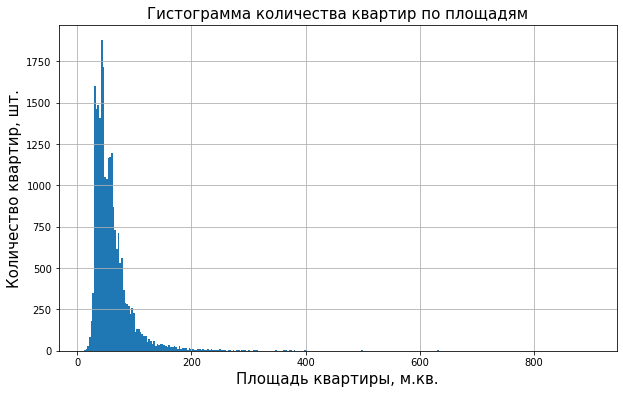

In [18]:
# Гистограмма количества квартир по площади.
# Размер графика
plt.figure(figsize=(10, 6))
df['total_area'].hist(bins=300)
plt.xlabel('Площадь квартиры, м.кв.', fontsize=15)
plt.ylabel('Количество квартир, шт.', fontsize=15)
plt.title('Гистограмма количества квартир по площадям', fontsize=15)
plt.show()

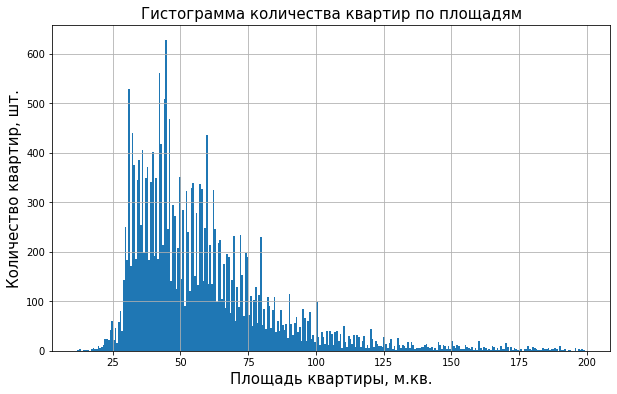

In [19]:
# Гистограмма количества квартир по площади до 200 метров.
df.query('total_area < 200').hist('total_area', bins=300, figsize=(10, 6))
plt.xlabel('Площадь квартиры, м.кв.', fontsize=15)
plt.ylabel('Количество квартир, шт.', fontsize=15)
plt.title('Гистограмма количества квартир по площадям', fontsize=15)
plt.show()

In [20]:
# Количество уникальных значений в столбще цены квартиры, минимальное и максимальное значение.
print('Количество уникальных значений:', df['last_price'].nunique())
print('Минимальная цена квартиры:', df['last_price'].min())
print('Максимальная цена квартиры:', df['last_price'].max())

Количество уникальных значений: 2925
Минимальная цена квартиры: 12190.0
Максимальная цена квартиры: 763000000.0


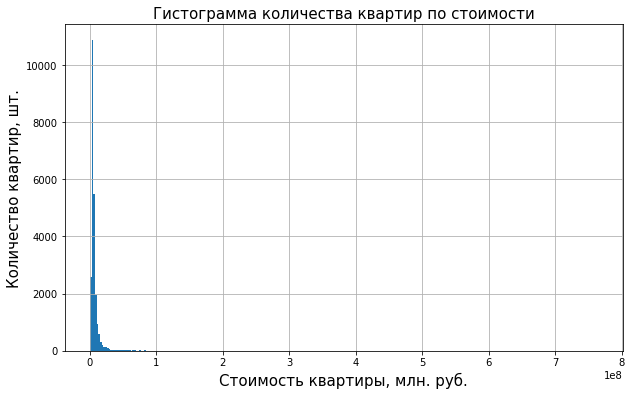

In [21]:
# Гистограмма количества квартир по цене.
df['last_price'].hist(bins=300, figsize=(10, 6))
plt.xlabel('Стоимость квартиры, млн. руб.', fontsize=15)
plt.ylabel('Количество квартир, шт.', fontsize=15)
plt.title('Гистограмма количества квартир по стоимости', fontsize=15)
plt.show()

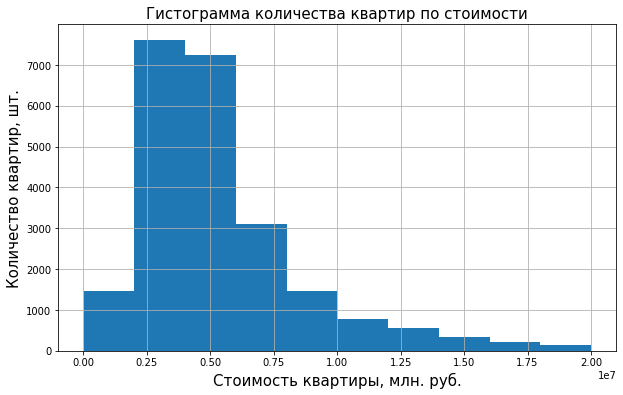

In [22]:
# Гистограмма количества квартир по цене.
df.query('last_price < 20000000').hist('last_price', bins=10, figsize=(10, 6))
plt.xlabel('Стоимость квартиры, млн. руб.', fontsize=15)
plt.ylabel('Количество квартир, шт.', fontsize=15)
plt.title('Гистограмма количества квартир по стоимости', fontsize=15)
plt.show()

In [23]:
# Количество уникальных значений в столбще количества комнат, минимальное и максимальное значение.
print('Количество уникальных значений:', df['rooms'].nunique())
print('Минимальное количество комнат:', df['rooms'].min(), 'штук')
print('Максимальное количество комнат:', df['rooms'].max(), 'штук')

Количество уникальных значений: 17
Минимальное количество комнат: 0 штук
Максимальное количество комнат: 19 штук


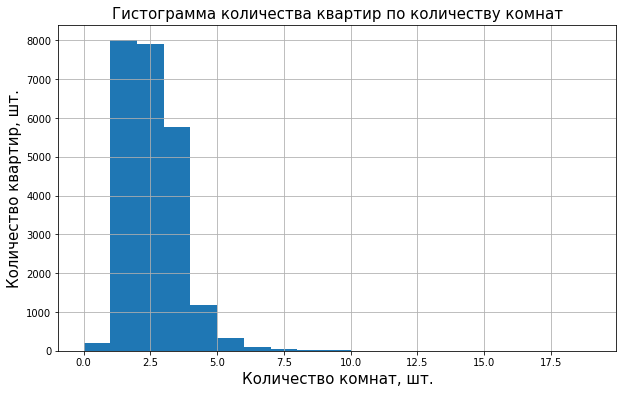

In [24]:
# Гистограмма количества квартир по количеству комнат.
df['rooms'].hist(bins=19, figsize=(10, 6))
plt.xlabel('Количество комнат, шт.', fontsize=15)
plt.ylabel('Количество квартир, шт.', fontsize=15)
plt.title('Гистограмма количества квартир по количеству комнат', fontsize=15)
plt.show()

Из гистограммы видно, что большинство квартир имеют меньше пяти комнат.
<br> В квартире профессора Преображенского было 7 комнат. Она считалась роскошной. Да и сейчас тоже роскошная. 
<br> Так же я видел двухкомнатную квартиру с кухней 8,5 метров в продаже за 600 млн рублей. Оказалось, что остальные помещения не жилые. И квартира на Ушаковской набережной была трех уровневой с залами, лепниной, спортивным залом, комнатами для прислуги. И всего двумя спальнями.
<br> Максимальную квартиру, что мне доводилось продавать - это 23 комнаты. В общаге был приватизирован целый этаж.
<br> Так что эти данные я считаю правдивыми.

In [25]:
# Количество уникальных значений в столбще высоты потолков, минимальное и максимальное значение.
print('Количество уникальных значений:', df['ceiling_height'].nunique())
print('Минимальная высота потолка:', df['ceiling_height'].min(), 'метр')
print('Максимальная высота потолка:', df['ceiling_height'].max(), 'метров')

Количество уникальных значений: 183
Минимальная высота потолка: 1.0 метр
Максимальная высота потолка: 100.0 метров


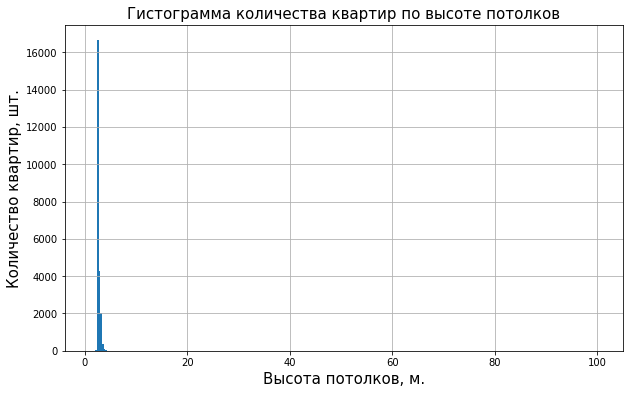

In [26]:
# Гистограмма количества квартир по высоте потолков.
df['ceiling_height'].hist(bins=300, figsize=(10, 6))
plt.xlabel('Высота потолков, м.', fontsize=15)
plt.ylabel('Количество квартир, шт.', fontsize=15)
plt.title('Гистограмма количества квартир по высоте потолков', fontsize=15)
plt.show()

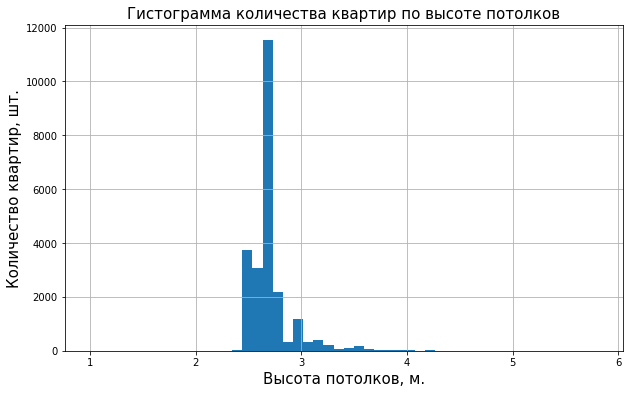

In [27]:
# Гистограмма количества квартир по высоте потолков.
df.query('ceiling_height < 6').hist('ceiling_height', bins=50, figsize=(10, 6))
plt.xlabel('Высота потолков, м.', fontsize=15)
plt.ylabel('Количество квартир, шт.', fontsize=15)
plt.title('Гистограмма количества квартир по высоте потолков', fontsize=15)
plt.show()

### Изучение времени продажи квартиры.

In [28]:
# Количество уникальных значений в столбще времени экспозиции квартиры, минимальное и максимальное значение.
print('Количество уникальных значений:', df['days_exposition'].nunique())
print('Минимальное время продажи квартиры:', df['days_exposition'].min(), 'день')
print('Максимальное время продажи квартиры:', df['days_exposition'].max(), 'дней')

Количество уникальных значений: 1139
Минимальное время продажи квартиры: 1.0 день
Максимальное время продажи квартиры: 1580.0 дней


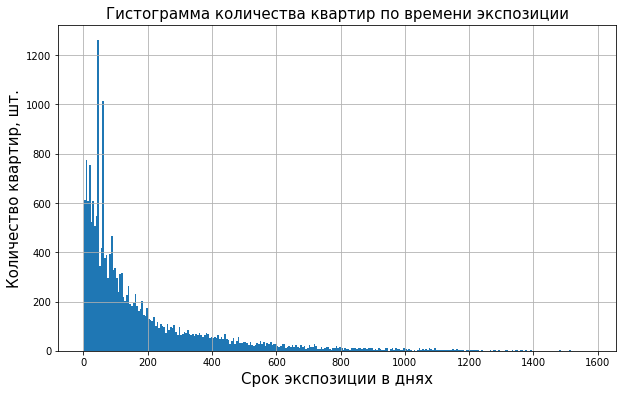

In [29]:
# Гистограмма количества квартир по времени экспозиции.
df['days_exposition'].hist(bins=300, figsize=(10, 6))
plt.xlabel('Срок экспозиции в днях', fontsize=15)
plt.ylabel('Количество квартир, шт.', fontsize=15)
plt.title('Гистограмма количества квартир по времени экспозиции', fontsize=15)
plt.show()

In [30]:
# Среднее время продажи
print('Среднее время продажи квартиры:',df['days_exposition'].mean().round(2), 'дней')

# Медиана столбца времени продажи 
print('Медиана времени продажи квартиры:',df['days_exposition'].median().round(2), 'дней')

Среднее время продажи квартиры: 180.74 дней
Медиана времени продажи квартиры: 95.0 дней


Из гистограммы видно, что большинство квартир продается в пределах года. 

<br> Из полученных цифр в среднем продажа идет пол года. По медиане чуть больше трех месяцев. Соответственно можно по цифрам сказать, что быстро - это меньше медианного времени (быстрее чем за три месяца). Долго - дольше полу года. Между средним и медианой - среднее время. 

<br> От себя могу добавить, что продажа за три месяца - это хорошо. Обычно долгая продажа связана с нежеланием продавца продавать по цене рынка. Все хотят продать свою квартиру дороже. Ведь она золотая, не то, что квартира соседа)))) Если сразу выставить объявление по рыночной цене, клиенты пойдут. И тут важно "зацепить клиента". Не знаю, кстати, в этом столбце учтено время регистрации сделки. У меня как-то во время переезда Росреестра сделку регистрировали 5 месяцев. Сейчас от 2 суток проходят документы. Объявление может ещё долго лежать на сайте.

<br> Продавать квартиру 4 года - это редкость среди сегмента массмаркета. Среди элитной, эксклюзивной, бизнес недвижимости, продажа может быть и дольше.

### Убираем редкие и выбивающиеся значения.

 Из всех гистограмм видно, что есть много выбивающихся значений. Необходимо от них избавиться, для получения более четкой картины данных. 
<br> Квартир площадью от 20 до 150 метров больше всего. Именно их возьмем для исследования.
<br> Квартир в ценовой категории до 20 млн. больше всего. Именно их возьмем для исследования.
<br> Квартир с количеством комнат от 1 до 6 больше всего. Именно их возьмем для исследования.
<br> Квартир с высотой потолков до 6 метров больше всего. Именно их возьмем для исследования.
<br> Квартир с временем продажи до 800 дней больше всего. Именно их возьмем для исследования.

In [31]:
df_srez = df.query('20 < total_area < 150 and last_price < 20000000 and rooms <= 6 and ceiling_height < 6 and days_exposition < 800')
#df_srez.info()
print('Количество объектов в исследовании:',len(df_srez))

Количество объектов в исследовании: 19124


### Изучение зависимости цены от площади, числа комнат, удаленности от центра, типа этажа и даты размещения объявления.

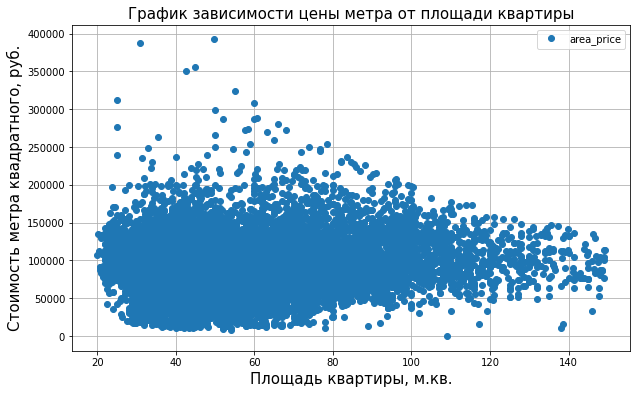

In [32]:
# Строим график зависимости цены метра от площади.
df_srez.plot(x='total_area', y='area_price', title='total_area', style='o', grid=True, figsize=(10, 6))
plt.xlabel('Площадь квартиры, м.кв.', fontsize=15)
plt.ylabel('Стоимость метра квадратного, руб.', fontsize=15)
plt.title('График зависимости цены метра от площади квартиры', fontsize=15)
plt.show()

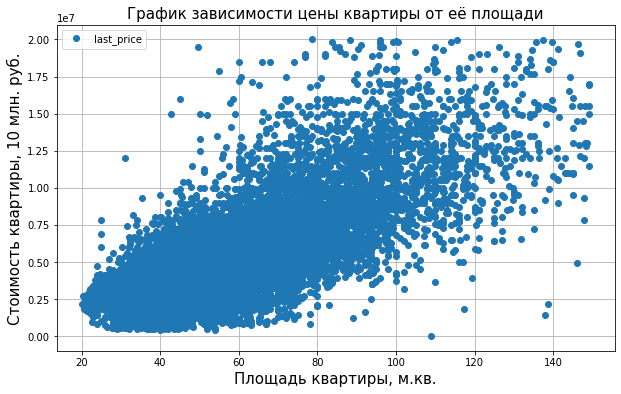

In [33]:
# Строим график зависимости цены квартиры от площади.
df_srez.plot(x='total_area', y='last_price', title='total_area', style='o', grid=True, figsize=(10, 6))
plt.xlabel('Площадь квартиры, м.кв.', fontsize=15)
plt.ylabel('Стоимость квартиры, 10 млн. руб.', fontsize=15)
plt.title('График зависимости цены квартиры от её площади', fontsize=15)
plt.show()

При увеличении размера квартиры, как и следовало ожидать, стоимость квадратного метра снижается, а стоимость квартиры увеличивается. И в этих графиках мы видим, что есть выходящие из этого правила значения. Могу смело сказать, что квартира в далеко находящемся умирающем поселке будет стоить дешевле, чем аналогичная возле Эрмитажа или Смольного. Но поскольку в условиях задачи мы берем всю выборку по всем типам квартир, это видно слабо.

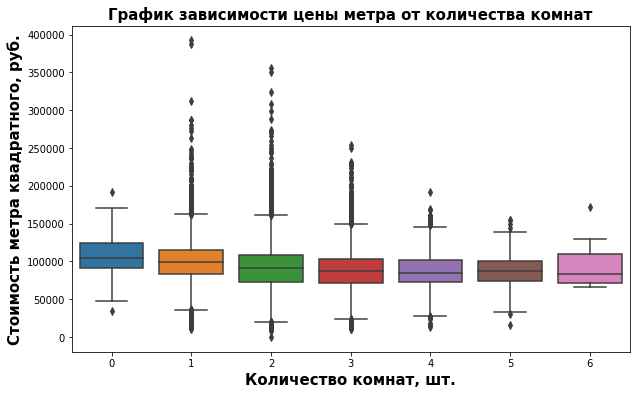

In [37]:
# Строим график зависимости цены метра от количества комнат.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_srez, x='rooms', y='area_price')
plt.xlabel('Количество комнат, шт.', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость метра квадратного, руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены метра от количества комнат', fontsize = 15, fontweight='bold')
plt.show()

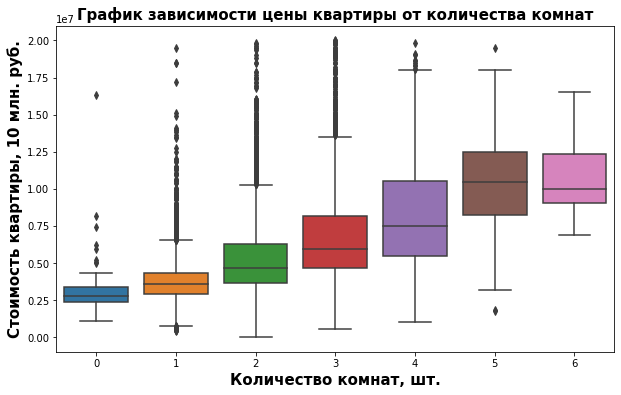

In [39]:
# Строим график зависимости цены квартиры от количества комнат.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_srez, x='rooms', y='last_price')
plt.xlabel('Количество комнат, шт.', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость квартиры, 10 млн. руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены квартиры от количества комнат', fontsize = 15, fontweight='bold')
plt.show()

 При увеличении количества комнат, стоимость метра падает. А стоимость всей квартиры растет. Но мы не учитываем, что квартиры могут быть в разных уголках Лен Области. И разброс цен на квартиры достаточно велик. Поэтому видим много одиночных значений за пределами диаграммы - выбросы. Полагаю, что это квартиры в далеких поселках и деревнях.

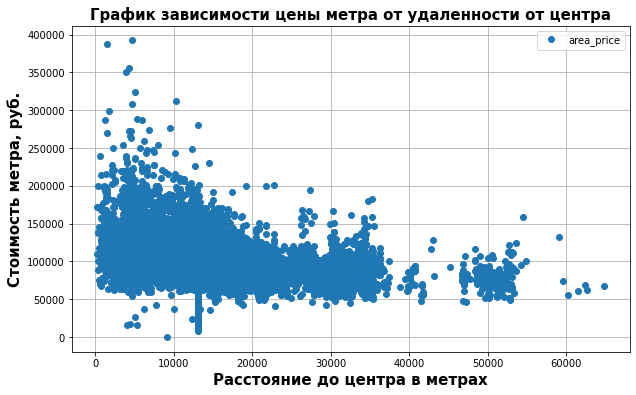

In [42]:
 # Строим график зависимости цены метра от удаленности от центра.
df_srez.plot(x='city_centers_nearest', y='area_price', title='city_centers_nearest', style='o', grid=True, figsize=(10, 6))
plt.xlabel('Расстояние до центра в метрах', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость метра, руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены метра от удаленности от центра', fontsize = 15, fontweight='bold')
plt.show()

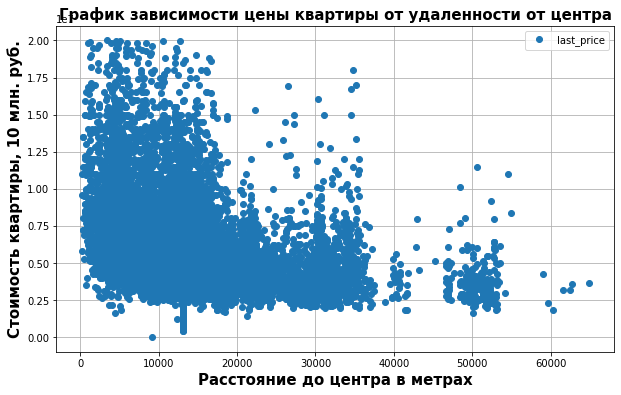

In [44]:
# Строим график зависимости цены квартиры от удаленности от центра.
df_srez.plot(x='city_centers_nearest', y='last_price', title='city_centers_nearest', style='o', grid=True, figsize=(10, 6))
plt.xlabel('Расстояние до центра в метрах', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость квартиры, 10 млн. руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены квартиры от удаленности от центра', fontsize = 15, fontweight='bold')
plt.show()

Чем дальше от центра СПб, тем дешевле квартиры. Если бы в условиях задачи было сравнить однотипные квартиры по количеству комнат в пределах типа этажа, площади, размера кухни. То мы бы получили более четко видимую зависимость.

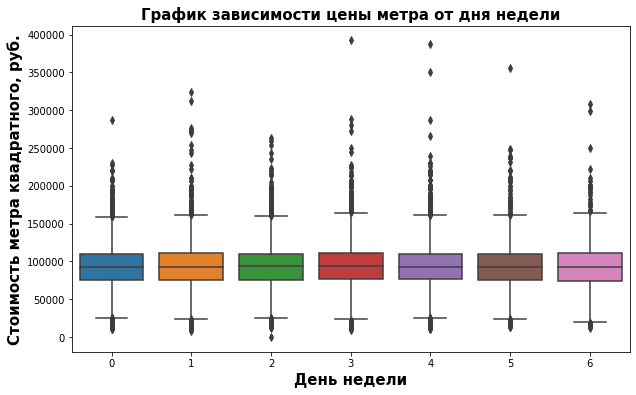

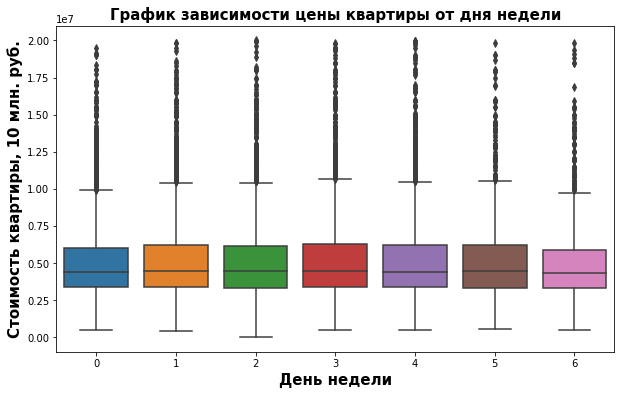

In [47]:
# Строим график зависимости цены метра и цены квартиры от дня недели.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_srez, x='day_week', y='area_price')
plt.xlabel('День недели', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость метра квадратного, руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены метра от дня недели', fontsize = 15, fontweight='bold')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_srez, x='day_week', y='last_price')
plt.xlabel('День недели', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость квартиры, 10 млн. руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены квартиры от дня недели', fontsize = 15, fontweight='bold')
plt.show()

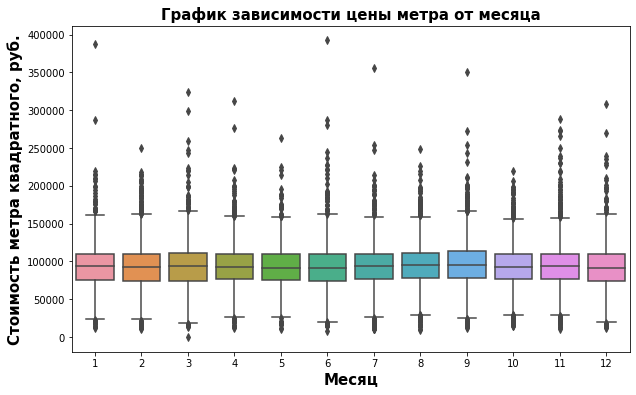

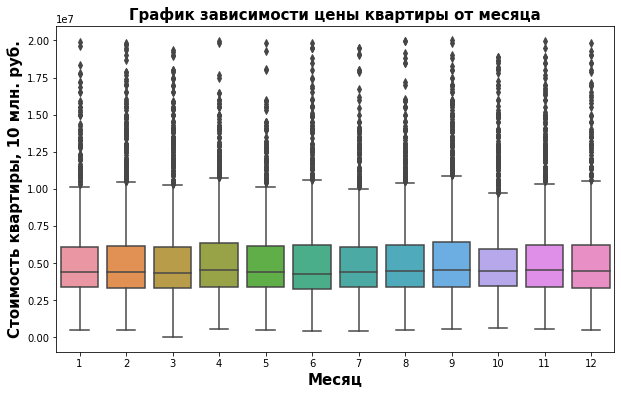

In [48]:
# Строим график зависимости цены метра и цены квартиры от месяца.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_srez, x='month', y='area_price')
plt.xlabel('Месяц', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость метра квадратного, руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены метра от месяца', fontsize = 15, fontweight='bold')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_srez, x='month', y='last_price')
plt.xlabel('Месяц', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость квартиры, 10 млн. руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены квартиры от месяца', fontsize = 15, fontweight='bold')
plt.show()

Может быть психологи и смогу что-то возразить, но на таких графиках мы не видим разницы в ценах ни средних ни абсолютных. Есть небольшие вбросы, но они не существенны на общем фоне.<br> 

В январе и июле традиционные спады активности покупателей и продавцов есть. Но на цене они не сказываются как-то существенно.
<br> 

После падения рубля в 2014 году в почти два раза, покупательская способность населения упала. Это с одной стороны. С другой - застройщики начали выводить на рынок больше квартир меньшего размера. Если в городе и крупных городах спутниках и райцентрах ещё как-то держались, то в далеких поселках цены падали. Так же падение цен происходило в первые пол года 2016. Тогда ввели новые правила налогооблажения. И народ продавал квартиры, пока они не вступили в силу с 17 июля 2016. А за последующие 6 месяцев падение было компенсировано ростом. Цены откатились назад к уровням января 2016.
<br> 

На этих диаграммах это видно, но слабо. Мы видим увеличение разброса цен и уменьшение средней цены квартиры по сравнению с 2014 годом. Слабый рост цены метра и квартиры виден в 2019 году. Но опять таки: в этих данных есть объявления, что на дату составления выборки ещё не проданы. Цена продавца есть, но она не актуальна.

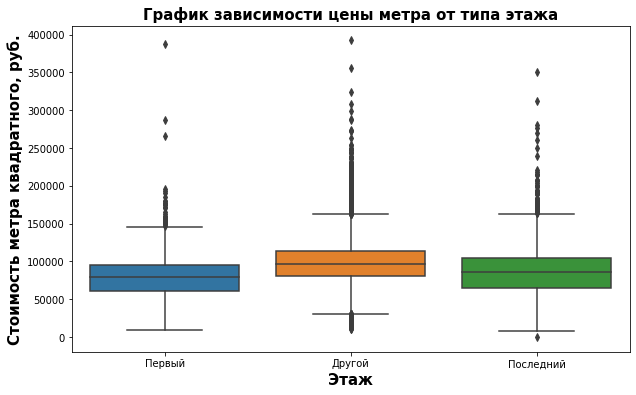

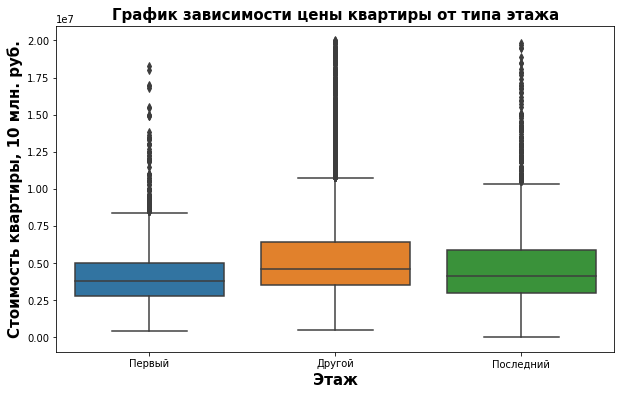

In [49]:
# Строим график зависимости цены метра и цены квартиры от типа этажа.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_srez, x='floor_type', y='area_price')
plt.xlabel('Этаж', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость метра квадратного, руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены метра от типа этажа', fontsize = 15, fontweight='bold')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_srez, x='floor_type', y='last_price')
plt.xlabel('Этаж', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость квартиры, 10 млн. руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены квартиры от типа этажа', fontsize = 15, fontweight='bold')
plt.show()

Больше всего квартир находится между первым и последним этажами. Они ценятся больше всего. При выборе между первым и последним этажами, люди охотнее выбирают последний. Все таки в окна никто не посмотрит, запахи с газонов не так доносятся, солнца больше, над головой никто не ходит и прочее и прочее...Это подтверждается графиками.

### Исследование по населенным пунктам.

In [68]:
# Сперва находим список с наибольшим количество объявлений по населенным пунктам. Выбираем их них первые 10.
locality_top_10 = df_srez['locality_name'].value_counts().head(10)
locality_top_10

Санкт-Петербург      12526
посёлок Мурино         499
посёлок Шушары         399
Всеволожск             327
Колпино                303
посёлок Парголово      296
деревня Кудрово        289
Пушкин                 284
Гатчина                257
Выборг                 201
Name: locality_name, dtype: int64

Сразу бросается в глаза ошибка: города Колпино, Пушкин и поселок Парголово входят в состав города Санкт-Петербург. Кудрово стал городом в 2018 году. Юридически не корректная группировка получилась. 

In [71]:
# Столбуц area_price содержит информацию по цене за метр квадратный. По нему вычислим среднюю величину.
# Далее делаем срез по данным из списка с самым большим количеством объявлений.
pd.pivot_table(df_srez, 
               index=["locality_name"], 
               values=["area_price"]).round(2).sort_values(by='area_price',
                                                           ascending=False).query('locality_name in @locality_top_10.index')



,area_price
locality_name,
Санкт-Петербург,107036.00
Пушкин,100473.94
деревня Кудрово,92529.97
посёлок Парголово,89556.31
посёлок Мурино,85862.27
посёлок Шушары,77749.87
Колпино,74692.67
Гатчина,68075.78
Всеволожск,66960.12


Из полученного результата видно, что самая дорогая недвижимость находится в Санкт-Петербурге. Самая дешевая из топ-10 в Выборге.

### Изучение квартир в Санкт-Петербурге. Поиск квартир в центре.

In [72]:
# Создаем таблицу с данными только по СПб.
df_spb = df_srez[df_srez['locality_name'] == 'Санкт-Петербург'].reset_index()

# Создаем новый столбец с расстояниями до центра города и округляем его до километра: center_km
df_spb['center_km'] = round(df_spb['city_centers_nearest']/1000,0)
df_spb['center_km'] = df_spb['center_km'].astype(int)

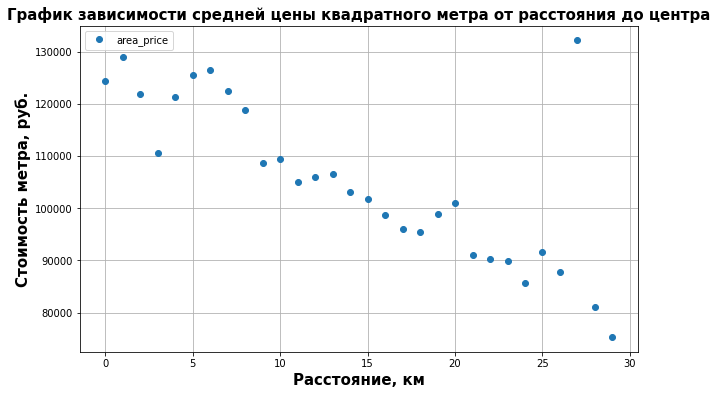

In [78]:
# Считаем среднюю цену для каждого километра и строим график.
(
    pd.pivot_table(df_spb, index=["center_km"],values=["area_price"])
    .sort_values(by='area_price',ascending=False)
    .plot(style='o', grid=True, figsize=(10, 6))    
)
plt.xlabel('Расстояние, км', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость метра, руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости средней цены квадратного метра от расстояния до центра', fontsize = 15, fontweight='bold')
plt.show()

График сильно меняется на расстоянии 9 км. Будем считать, что первые 8 км - это центр города.
<br> Данные на 3 и 27 километрах будем считать вбросами.
<br> Хотелось бы от себя добавить, что центром города можно считать "Золотой треугольник" и немного вокруг него (буквально 4 км). Это части центрального района, Петраградки и Васьки. Остальные части этих районов и Адмиралтейский центром трудно считать, хотя там относительно не далеко до Дворцовой.

### Изучение квартир в центре Санкт-Петербурга.

Изучаем параметры: площадь, цена, число комнат, высота потолков. Выделяем фактор, которые влияют на стоимость: число комнат, этаж, удаленность от центра, дата размещения объявления.

In [80]:
# Делаем новую переменную для работы только с центральными квартирами. Изучаем параметры.
df_spb_center = df_spb.query('center_km < 9')
print(f"Площадь квартир колеблется от {df_spb_center['total_area'].min()} до {df_spb_center['total_area'].max()} метров квадратных")
print(f"Цена квартир колеблется от {df_spb_center['last_price'].min()} до {df_spb_center['last_price'].max()} рублей")
print(f"Число комнат колеблется от {df_spb_center['rooms'].min()} до {df_spb_center['rooms'].max()} штук")
print(f"Высота потолков колеблется от {df_spb_center['ceiling_height'].min()} до {df_spb_center['ceiling_height'].max()} метров")

Площадь квартир колеблется от 20.3 до 149.2 метров квадратных
Цена квартир колеблется от 1600000.0 до 19999000.0 рублей
Число комнат колеблется от 0 до 6 штук
Высота потолков колеблется от 2.4 до 5.8 метров


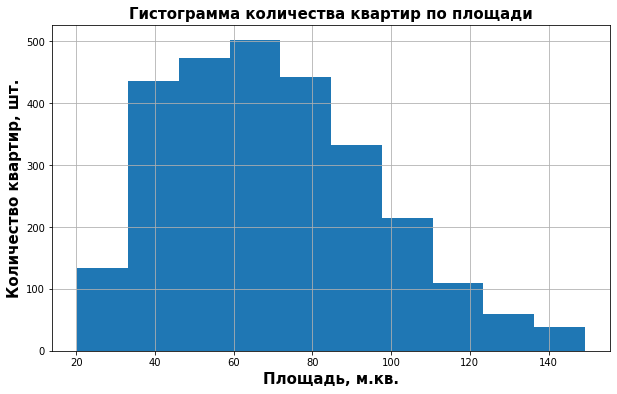

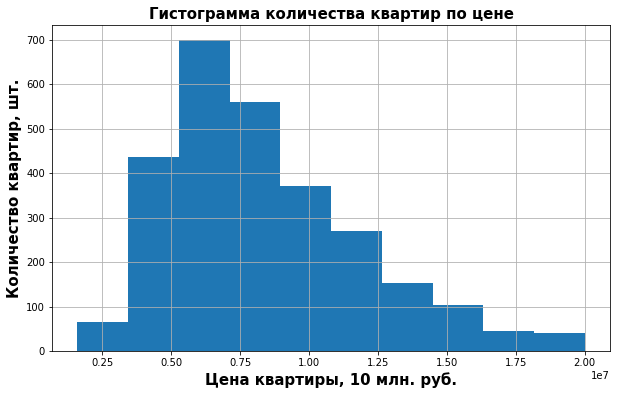

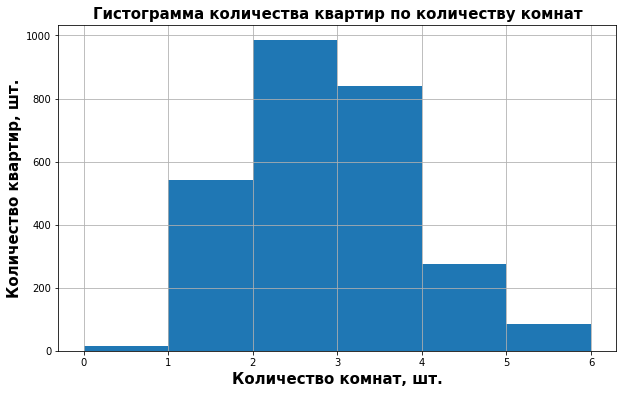

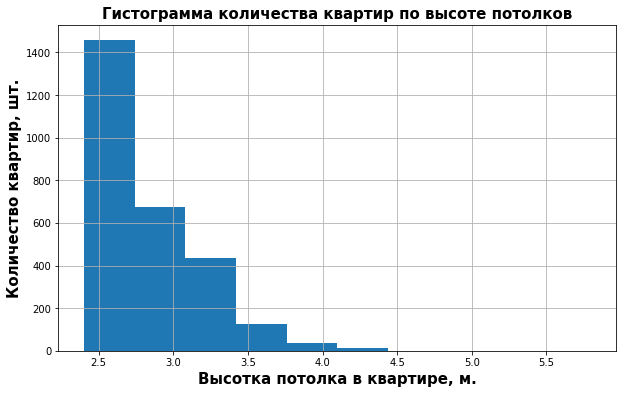

In [86]:
# Строим гистограммы.
df_spb_center['total_area'].hist(bins=10, figsize=(10, 6))
plt.xlabel('Площадь, м.кв.', fontsize = 15, fontweight='bold')
plt.ylabel('Количество квартир, шт.', fontsize = 15, fontweight='bold')
plt.title('Гистограмма количества квартир по площади', fontsize = 15, fontweight='bold')
plt.show()
df_spb_center['last_price'].hist(bins=10, figsize=(10, 6))
plt.xlabel('Цена квартиры, 10 млн. руб.', fontsize = 15, fontweight='bold')
plt.ylabel('Количество квартир, шт.', fontsize = 15, fontweight='bold')
plt.title('Гистограмма количества квартир по цене', fontsize = 15, fontweight='bold')
plt.show()
df_spb_center['rooms'].hist(bins=6, figsize=(10, 6))
plt.xlabel('Количество комнат, шт.', fontsize = 15, fontweight='bold')
plt.ylabel('Количество квартир, шт.', fontsize = 15, fontweight='bold')
plt.title('Гистограмма количества квартир по количеству комнат', fontsize = 15, fontweight='bold')
plt.show()
df_spb_center['ceiling_height'].hist(bins=10, figsize=(10, 6))
plt.xlabel('Высотка потолка в квартире, м.', fontsize = 15, fontweight='bold')
plt.ylabel('Количество квартир, шт.', fontsize = 15, fontweight='bold')
plt.title('Гистограмма количества квартир по высоте потолков', fontsize = 15, fontweight='bold')
plt.show()

Особые отличия от квартир не в центре есть, но не большие. 

<br> Из параметра площади мы видим, что нет квартир меньше 30 метров. В середине 2010-х годов начали строить квартиры студии в спальных районах. Я видел квартиры-студии по 20,5 метров. В центре студии есть, но площадь как мы видим не меньше 30.

<br> По цене понятно, что чем ближе к центру, тем дороже. Но по опыту могу сказать, что есть квартиры которые стоят с разницей в десятки раз при одинаковых параметрах площади, этажа, потолка... Просто у одной окна на какую-то достопримечательность, а вторая смотрит во двор колодец. В общей массе рассматриваемых квартир по цене мы видим только большую цену в центре. Изменение цены с площадью такое же как в остальной массе.

<br> По количеству комнат в центре больше больших квартир. Так исторически сложилось, что строили и сейчас и после войны много квартир до 4 комнат. А в центре есть много квартир с большим количеством. Кстати, в последние 25 лет строят все меньше трех и четырех комнатных квартир. Про большее количество комнат можно не вспоминать. А в центре такие квартиры есть. Я как-то расселял квартиру с 13 комнатами.

<br> По высоте потолков в центре мало низких потолков. Но они есть. Это связано с мансардными этажами, техническими, бельэтажем... Есть дома построенные до революции для приезжих рабочих. Там ужасные были условия жизни. Квартиры в советское время перестраивали. Делали кухни и санузлы. Но изменить высоту потолка не могли. Но и с потолками выше 3 метров ситуация очень интересная. Кроме как в центре СПб потолки по 3 метра есть в сталинках и в спальных районах и в Ленобласти. Но вот 4, 5, 6 метров - таких потолков не строили ни до революции ни после. Так что смело можно сказать, что в центре города находятся большинство квартир с высокими потолками.

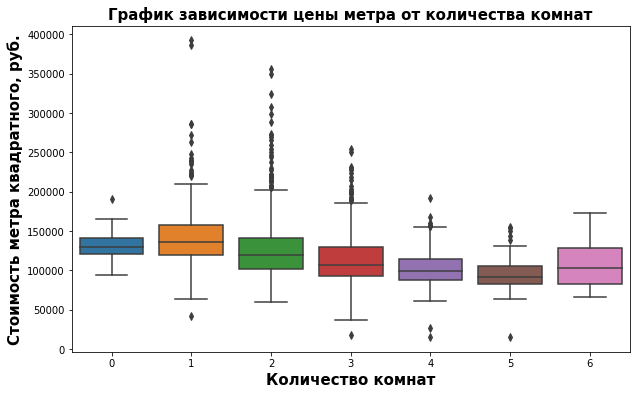

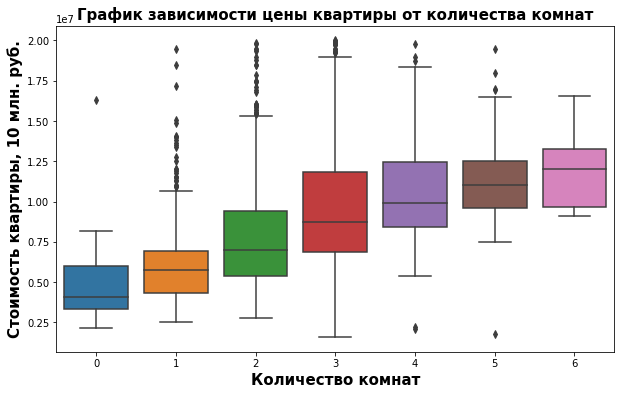

In [89]:
# Строим график зависимости цены метра и цены квартиры от числа комнат.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_spb_center, x='rooms', y='area_price')
plt.xlabel('Количество комнат', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость метра квадратного, руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены метра от количества комнат', fontsize = 15, fontweight='bold')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_spb_center, x='rooms', y='last_price')
plt.xlabel('Количество комнат', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость квартиры, 10 млн. руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены квартиры от количества комнат', fontsize = 15, fontweight='bold')
plt.show()

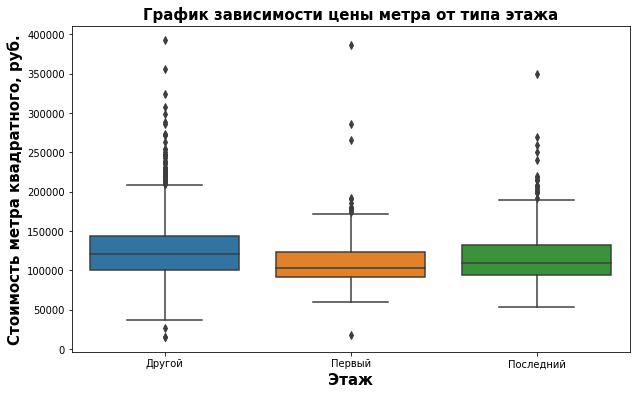

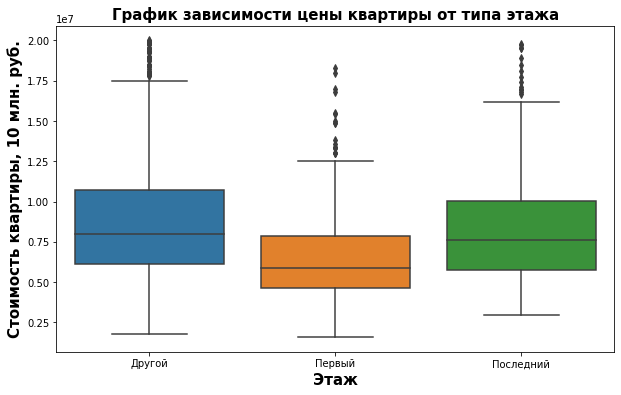

In [90]:
# Строим график зависимости цены метра и цены квартиры от этажа(первый, последний, другой).
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_spb_center, x='floor_type', y='area_price')
plt.xlabel('Этаж', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость метра квадратного, руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены метра от типа этажа', fontsize = 15, fontweight='bold')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_spb_center, x='floor_type', y='last_price')
plt.xlabel('Этаж', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость квартиры, 10 млн. руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены квартиры от типа этажа', fontsize = 15, fontweight='bold')
plt.show()

На графиках видно, что цена квартир растет с увеличение количества комнат, ведь площадь увеличивается. А вот квартиры с 6 комнатами стоят дешевле. Возможно, что это связано с размером общей площади квартиры. Цена за метр падает с увеличение числа комнат.

Здесь все как и в прошлом исследовании распределения цен по типу этажей: предпочтительнее центральные этажи. Первый самый дешевый. Последний в серединке. Как по цене квартиры, так и по цене за метр.

Количество объявлений в центре города на каждый километр составляет:center_km
0     11
1    125
2    184
3    225
4    468
5    581
6    411
7    279
8    458
Name: center_km, dtype: int64


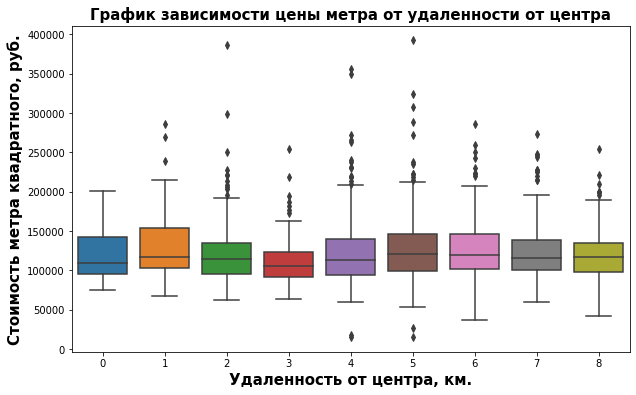

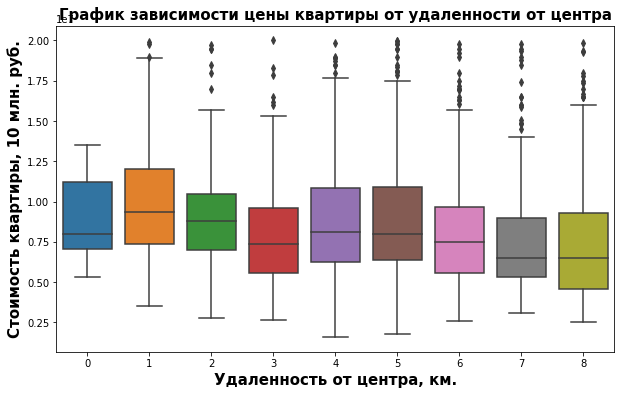

In [93]:
# Строим график зависимости цены метра и цены квартиры от удаленности от центра.
print(f"Количество объявлений в центре города на каждый километр составляет:{df_spb_center.groupby('center_km')['center_km'].count()}")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_spb_center, x='center_km', y='area_price')
plt.xlabel('Удаленность от центра, км.', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость метра квадратного, руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены метра от удаленности от центра', fontsize = 15, fontweight='bold')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_spb_center, x='center_km', y='last_price')
plt.xlabel('Удаленность от центра, км.', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость квартиры, 10 млн. руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены квартиры от удаленности от центра', fontsize = 15, fontweight='bold')
plt.show()

Самый дорогой метр в самом центре: на нулевом и первом километрах, но и квартир там продается меньше всего. Дальше цена за метр падает. Поскольку в выборке квартиры не делятся по площадям, мы имеем довольно однородную картину разброса цен на квартиры. В то время как цена за метр изменяется.

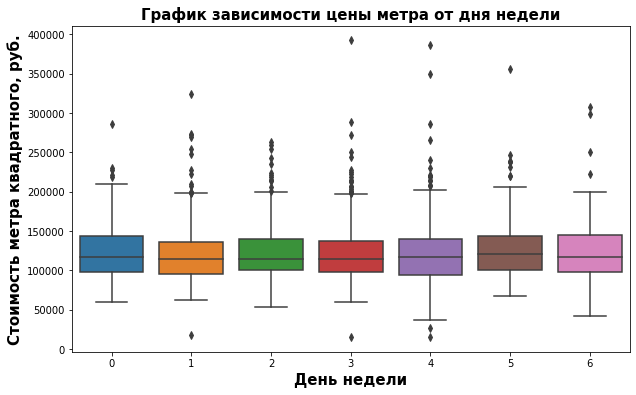

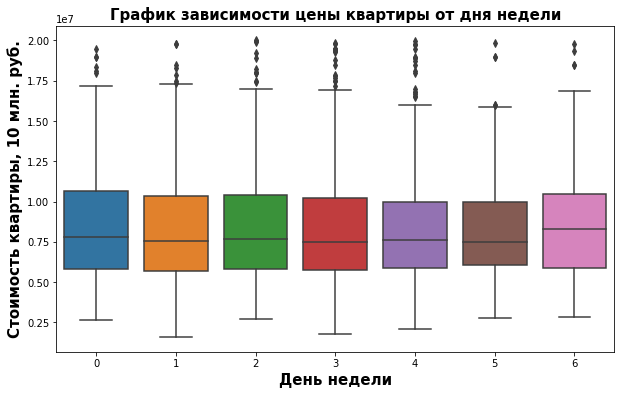

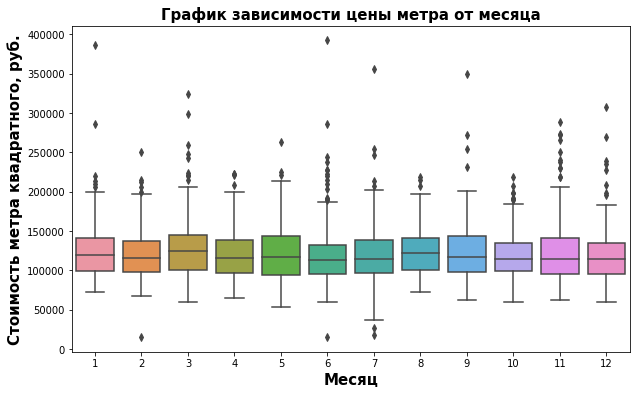

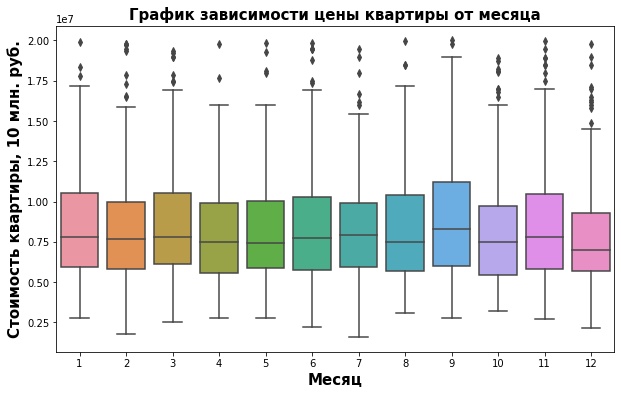

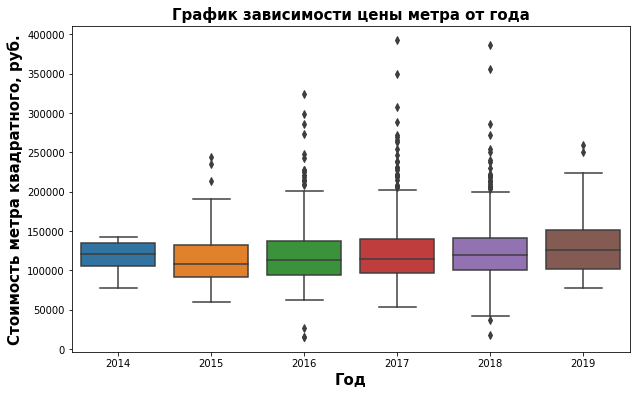

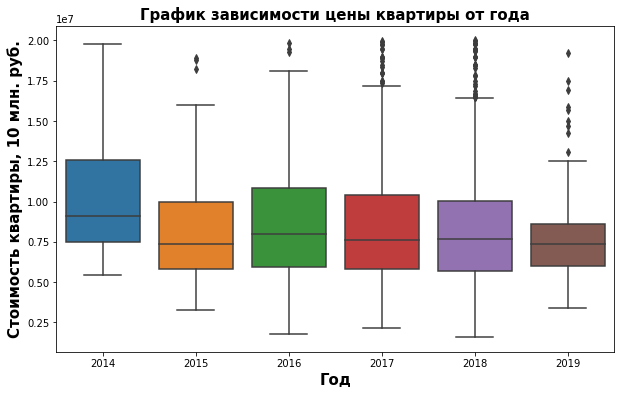

In [94]:
# Строим график зависимости цены метра и цены квартиры от даты размещения объявления(день недели, месяц, год).
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_spb_center, x='day_week', y='area_price')
plt.xlabel('День недели', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость метра квадратного, руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены метра от дня недели', fontsize = 15, fontweight='bold')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_spb_center, x='day_week', y='last_price')
plt.xlabel('День недели', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость квартиры, 10 млн. руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены квартиры от дня недели', fontsize = 15, fontweight='bold')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_spb_center, x='month', y='area_price')
plt.xlabel('Месяц', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость метра квадратного, руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены метра от месяца', fontsize = 15, fontweight='bold')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_spb_center, x='month', y='last_price')
plt.xlabel('Месяц', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость квартиры, 10 млн. руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены квартиры от месяца', fontsize = 15, fontweight='bold')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_spb_center, x='year', y='area_price')
plt.xlabel('Год', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость метра квадратного, руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены метра от года', fontsize = 15, fontweight='bold')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_spb_center, x='year', y='last_price')
plt.xlabel('Год', fontsize = 15, fontweight='bold')
plt.ylabel('Стоимость квартиры, 10 млн. руб.', fontsize = 15, fontweight='bold')
plt.title('График зависимости цены квартиры от года', fontsize = 15, fontweight='bold')
plt.show()

По дням недели разбросы цены квартиры не велики. А вот цена за метр скачет с середины недели до её конца сильнее чем в начале.
<br> По месяцам и годам данные повторяют значения из предыдущего исследования.

Зависимости от параметров квартир в центре Санкт-Петербурга повторяют общую картину с поправкой на количество обьявлений и на их цену. Относительные величины очень похожи.

## Общий вывод

В ходе исследования была посчитана цена квадратного метра, соотношения площадей частей квартиры к общей площади. 
<br> Был проведен исследовательский анализ данных и выполнены следующие инструкции:
- Изучены параметры: площадь, цена, число комнат, высота потолков. Построены гистограммы.
- Изучено время продажи квартиры. Построена гистограмма. Посчитаны быстрая, средняя и долгая продажи.
- Убраны редкие и выбивающиеся значения. 
- Изучена зависимость цены от площади, числа комнат, удалённости от центра. А так же зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучена зависимость от даты размещения: дня недели, месяца и года.
- Выбраны 10 населённых пунктов с наибольшим числом объявлений. Посчитаны средняя цена квадратного метра в этих населённых пунктах. Выделены населённые пункты с самой высокой и низкой стоимостью жилья. 
- Выделены квартиры в Санкт-Петербурге. Выяснено, какая область входит в центр. Построен график зависимости цены от удалённости от центра. Определена центральная зона.
- Проанализирован сегмент квартир в центре и изучены следующие параметры: площадь, цена, число комнат, высота потолков. Также выделены факторы, которые влияют на стоимость квартиры.
<br> Более дорогие квартиры находятся в центральных этажах в центре Санкт-Петербурга (по цене за метр площади квартиры). Самы дешевые в далеких небольших поселках. Из топ-10 по цене за метр половина населенных пунктов являвется частью Санкт-Петербурга. А на десятом месте город всего в 9 км от границы СПб.
<br> От дней недели подачи объявления зависимость цены вывести не удалось. А вот год и месяц влияют на цену.

Для поиска аномалий и мошеннических объявлений следует использовать следующие относительные параметры:
- Размер средней цены за метр площади (от 11 до 169 тысяч за метр в зависимости от населенного пункта)
- Высота потолков (от 2 до 6 метров для центра Санкт-Петербурга и до 4 метров в остальных населенных пунктах)
- Квартиры на первом и последнем этажах стоят дешевле чем на дргуих. Исключения могут быть только для многоуровневых квартир. Но в рамках этого исследования таких данных нет.
- Квартиры с количеством комнат больше чем 4 есть в центре Санкт-Петербурга. В спальных районах и в других населенных пунктах они могут быть, но с ними надо быть острожными. Возможно что это объединение нескольких квартир с территорией общей площади. Покупка таких квартир не безопасна.